In [18]:
import numpy as np
import pandas as pd

In [19]:
import numpy as np
import pandas as pd

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
import csv

# Specify the file path
file_path = 'HR-Employee-Attrition.csv'
hr_data =  pd.read_csv('HR-Employee-Attrition.csv')
# Open the CSV file and read its contents
with open(file_path, 'r') as csv_file:
    data_read = csv.reader(csv_file)
    
    # Read each row in the CSV file
    for row in data_read:
        print(row)

In [22]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [23]:
# Calculate Attrition Rate
attrition_data = hr_data['Attrition'].value_counts(normalize=True) * 100
attrition_rate = attrition_data['Yes']

# Prepare data for analysis by key factors
# Here, we'll look at a few examples: Department, JobRole, DistanceFromHome, MonthlyIncome
attrition_by_department = hr_data.groupby('Department')['Attrition'].value_counts(normalize=True) * 100
attrition_by_job_role = hr_data.groupby('JobRole')['Attrition'].value_counts(normalize=True) * 100
attrition_by_distance = hr_data.groupby(pd.cut(hr_data['DistanceFromHome'], bins=3))['Attrition'].value_counts(normalize=True) * 100

# Average Monthly Income for those who left vs. those who stayed
average_income_by_attrition = hr_data.groupby('Attrition')['MonthlyIncome'].mean()

attrition_rate, attrition_by_department.unstack(), attrition_by_job_role.unstack(), attrition_by_distance.unstack(), average_income_by_attrition


C:\Users\Inspiron\AppData\Local\Temp\ipykernel_17824\2999303839.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_by_distance = hr_data.groupby(pd.cut(hr_data['DistanceFromHome'], bins=3))['Attrition'].value_counts(normalize=True) * 100


(16.122448979591837,
 Attrition                      No        Yes
 Department                                  
 Human Resources         80.952381  19.047619
 Research & Development  86.160250  13.839750
 Sales                   79.372197  20.627803,
 Attrition                         No        Yes
 JobRole                                        
 Healthcare Representative  93.129771   6.870229
 Human Resources            76.923077  23.076923
 Laboratory Technician      76.061776  23.938224
 Manager                    95.098039   4.901961
 Manufacturing Director     93.103448   6.896552
 Research Director          97.500000   2.500000
 Research Scientist         83.904110  16.095890
 Sales Executive            82.515337  17.484663
 Sales Representative       60.240964  39.759036,
 Attrition                No        Yes
 DistanceFromHome                      
 (0.972, 10.333]   85.964912  14.035088
 (10.333, 19.667]  79.534884  20.465116
 (19.667, 29.0]    78.602620  21.397380,
 Attrit

In [37]:

# Average monthly income across the organization and by department and job role
average_monthly_income_overall = hr_data['MonthlyIncome'].mean()
average_monthly_income_by_department = hr_data.groupby('Department')['MonthlyIncome'].mean()
average_monthly_income_by_job_role = hr_data.groupby('JobRole')['MonthlyIncome'].mean()

# Salary distribution by gender and age
average_salary_by_gender = hr_data.groupby('Gender')['MonthlyIncome'].mean()
salary_distribution_by_age = hr_data.groupby(pd.cut(hr_data['Age'], bins=5))['MonthlyIncome'].mean()

# Distribution of stock option levels
stock_option_distribution = hr_data['StockOptionLevel'].value_counts(normalize=True) * 100

average_monthly_income_overall, average_monthly_income_by_department, average_monthly_income_by_job_role, average_salary_by_gender, salary_distribution_by_age, stock_option_distribution


C:\Users\Inspiron\AppData\Local\Temp\ipykernel_17824\3732918774.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_distribution_by_age = hr_data.groupby(pd.cut(hr_data['Age'], bins=5))['MonthlyIncome'].mean()


(6502.931292517007,
 Department
 Human Resources           6654.507937
 Research & Development    6281.252862
 Sales                     6959.172646
 Name: MonthlyIncome, dtype: float64,
 JobRole
 Healthcare Representative     7528.763359
 Human Resources               4235.750000
 Laboratory Technician         3237.169884
 Manager                      17181.676471
 Manufacturing Director        7295.137931
 Research Director            16033.550000
 Research Scientist            3239.972603
 Sales Executive               6924.279141
 Sales Representative          2626.000000
 Name: MonthlyIncome, dtype: float64,
 Gender
 Female    6686.566327
 Male      6380.507937
 Name: MonthlyIncome, dtype: float64,
 Age
 (17.958, 26.4]     3107.364198
 (26.4, 34.8]       4919.946830
 (34.8, 43.2]       6764.870763
 (43.2, 51.6]       9541.937220
 (51.6, 60.0]      10719.282258
 Name: MonthlyIncome, dtype: float64,
 StockOptionLevel
 0    42.925170
 1    40.544218
 2    10.748299
 3     5.782313
 N

In [25]:
# Distribution of Performance Ratings
performance_rating_distribution = hr_data['PerformanceRating'].value_counts(normalize=True) * 100

# Average Job Satisfaction
average_job_satisfaction = hr_data['JobSatisfaction'].mean()

# Average Environment Satisfaction
average_environment_satisfaction = hr_data['EnvironmentSatisfaction'].mean()

performance_rating_distribution, average_job_satisfaction, average_environment_satisfaction


(PerformanceRating
 3    84.62585
 4    15.37415
 Name: proportion, dtype: float64,
 2.7285714285714286,
 2.721768707482993)

In [26]:
# Performance Ratings and Attrition
performance_ratings = hr_data.groupby('PerformanceRating')['Attrition'].value_counts(normalize=True).unstack() * 100

# Job Satisfaction and Attrition
job_satisfaction = hr_data.groupby('JobSatisfaction')['Attrition'].value_counts(normalize=True).unstack() * 100

# Environment Satisfaction and its correlation with Job Satisfaction
environment_satisfaction = hr_data.groupby('EnvironmentSatisfaction')['Attrition'].value_counts(normalize=True).unstack() * 100

performance_ratings, job_satisfaction, environment_satisfaction


(Attrition                 No        Yes
 PerformanceRating                      
 3                  83.922830  16.077170
 4                  83.628319  16.371681,
 Attrition               No        Yes
 JobSatisfaction                      
 1                77.162630  22.837370
 2                83.571429  16.428571
 3                83.484163  16.515837
 4                88.671024  11.328976,
 Attrition                       No        Yes
 EnvironmentSatisfaction                      
 1                        74.647887  25.352113
 2                        85.017422  14.982578
 3                        86.313466  13.686534
 4                        86.547085  13.452915)

In [27]:
# Gender and Marital Status Distribution
gender_distribution = hr_data['Gender'].value_counts(normalize=True) * 100
marital_status_distribution = hr_data['MaritalStatus'].value_counts(normalize=True) * 100

# Age Distribution
age_distribution = hr_data['Age'].describe()

# Diversity in Leadership Roles
# Assuming 'JobLevel' as an indicator of leadership roles, with higher numbers indicating higher levels.
leadership_gender_distribution = hr_data.groupby('JobLevel')['Gender'].value_counts(normalize=True).unstack() * 100
leadership_age_distribution = hr_data.groupby('JobLevel')['Age'].mean()

gender_distribution, marital_status_distribution, age_distribution, leadership_gender_distribution, leadership_age_distribution

(Gender
 Male      60.0
 Female    40.0
 Name: proportion, dtype: float64,
 MaritalStatus
 Married     45.782313
 Single      31.972789
 Divorced    22.244898
 Name: proportion, dtype: float64,
 count    1470.000000
 mean       36.923810
 std         9.135373
 min        18.000000
 25%        30.000000
 50%        36.000000
 75%        43.000000
 max        60.000000
 Name: Age, dtype: float64,
 Gender       Female       Male
 JobLevel                      
 1         36.648250  63.351750
 2         41.198502  58.801498
 3         43.119266  56.880734
 4         48.113208  51.886792
 5         34.782609  65.217391,
 JobLevel
 1    32.524862
 2    36.599251
 3    40.087156
 4    47.537736
 5    47.753623
 Name: Age, dtype: float64)

In [28]:
# Average Monthly Income Analysis
average_income_by_department = hr_data.groupby('Department')['MonthlyIncome'].mean()
average_income_by_job_role = hr_data.groupby('JobRole')['MonthlyIncome'].mean()
average_income_by_gender = hr_data.groupby('Gender')['MonthlyIncome'].mean()
average_income_by_age = hr_data.groupby(pd.cut(hr_data['Age'], bins=4))['MonthlyIncome'].mean()

# Stock Option Levels Analysis
stock_options_by_department = hr_data.groupby('Department')['StockOptionLevel'].mean()
stock_options_by_gender = hr_data.groupby('Gender')['StockOptionLevel'].mean()

# Salary Hikes and Performance Ratings
salary_hikes_by_performance = hr_data.groupby('PerformanceRating')['PercentSalaryHike'].mean()

average_income_by_department, average_income_by_job_role, average_income_by_gender, average_income_by_age, stock_options_by_department, stock_options_by_gender, salary_hikes_by_performance

C:\Users\Inspiron\AppData\Local\Temp\ipykernel_17824\516351076.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_income_by_age = hr_data.groupby(pd.cut(hr_data['Age'], bins=4))['MonthlyIncome'].mean()


(Department
 Human Resources           6654.507937
 Research & Development    6281.252862
 Sales                     6959.172646
 Name: MonthlyIncome, dtype: float64,
 JobRole
 Healthcare Representative     7528.763359
 Human Resources               4235.750000
 Laboratory Technician         3237.169884
 Manager                      17181.676471
 Manufacturing Director        7295.137931
 Research Director            16033.550000
 Research Scientist            3239.972603
 Sales Executive               6924.279141
 Sales Representative          2626.000000
 Name: MonthlyIncome, dtype: float64,
 Gender
 Female    6686.566327
 Male      6380.507937
 Name: MonthlyIncome, dtype: float64,
 Age
 (17.958, 28.5]     3457.228682
 (28.5, 39.0]       5499.236232
 (39.0, 49.5]       8537.959885
 (49.5, 60.0]      10942.907514
 Name: MonthlyIncome, dtype: float64,
 Department
 Human Resources           0.777778
 Research & Development    0.804370
 Sales                     0.773543
 Name: StockOpti

In [29]:
# Work-Life Balance Ratings Analysis
work_life_balance_ratings = hr_data['WorkLifeBalance'].value_counts(normalize=True) * 100

# Analyzing average years at company and correlation with career growth indicators
average_years_at_company = hr_data['YearsAtCompany'].mean()
average_years_in_current_role = hr_data['YearsInCurrentRole'].mean()
average_years_since_last_promotion = hr_data['YearsSinceLastPromotion'].mean()

work_life_balance_ratings,average_years_at_company, average_years_in_current_role, average_years_since_last_promotion

(WorkLifeBalance
 3    60.748299
 2    23.401361
 4    10.408163
 1     5.442177
 Name: proportion, dtype: float64,
 7.0081632653061225,
 4.229251700680272,
 2.1877551020408164)

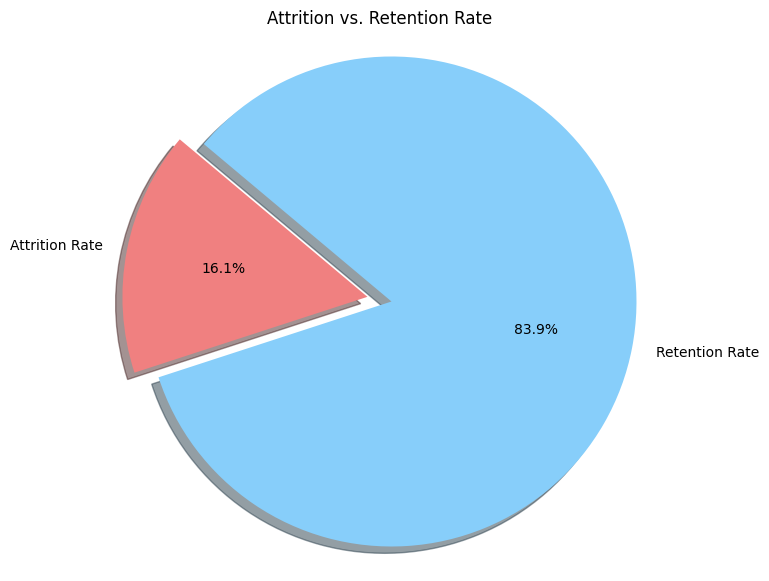

In [30]:
import matplotlib.pyplot as plt

# Attrition data
attrition_rate = 16.12
retention_rate = 100 - attrition_rate

# Data to plot
labels = 'Attrition Rate', 'Retention Rate'
sizes = [attrition_rate, retention_rate]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice (Attrition)

# Plot
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Attrition vs. Retention Rate')
plt.show()


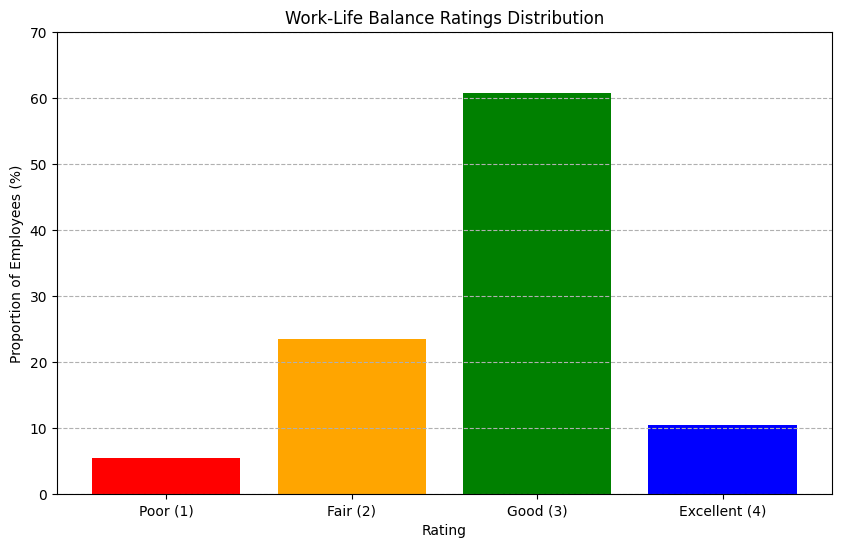

In [31]:
import matplotlib.pyplot as plt

# Data for Work-Life Balance ratings distribution
ratings = ['Poor (1)', 'Fair (2)', 'Good (3)', 'Excellent (4)']
proportions = [5.44, 23.40, 60.75, 10.41]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(ratings, proportions, color=['red', 'orange', 'green', 'blue'])
plt.title('Work-Life Balance Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Proportion of Employees (%)')
plt.ylim(0, 70)  # Extend y-axis to make it easier to read proportions
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.show()


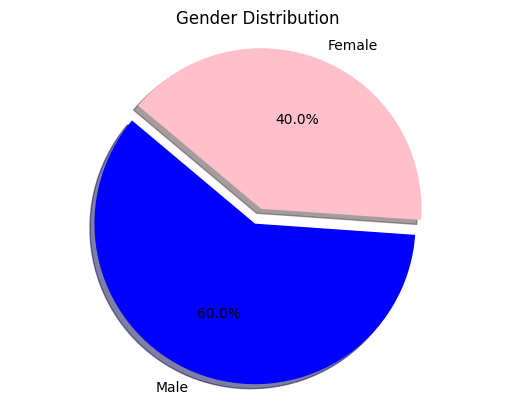

In [32]:
import matplotlib.pyplot as plt

# Gender distribution data
labels = 'Male', 'Female'
sizes = [60, 40]
colors = ['blue', 'pink']
explode = (0.1, 0)  # explode the 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender Distribution')
plt.show()


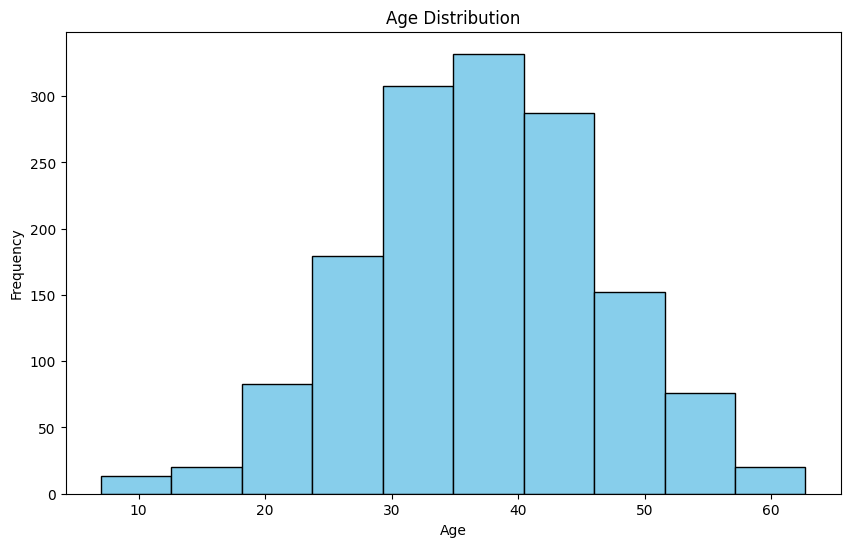

In [33]:
import numpy as np

# Assuming 'ages' is available
ages = np.random.normal(loc=36.92, scale=9.13, size=1470)  # Example data

plt.figure(figsize=(10, 6))
plt.hist(ages, bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



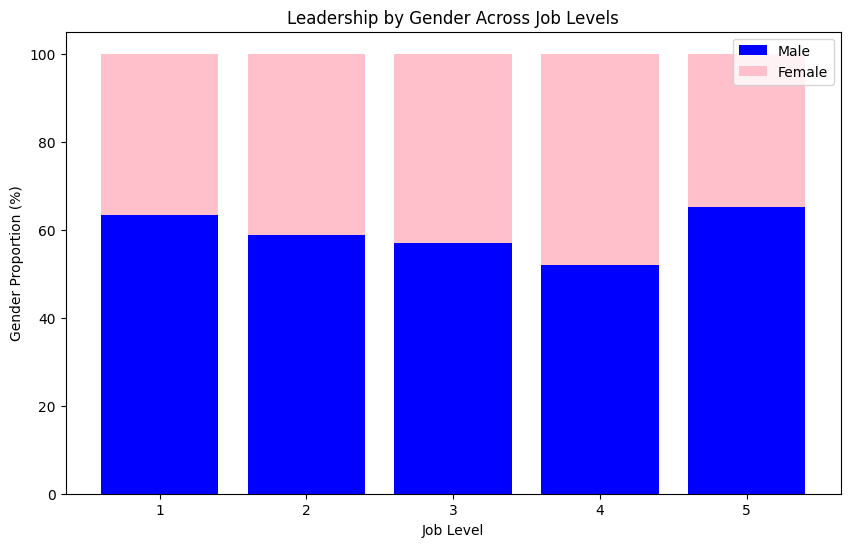

In [34]:
job_levels = [1, 2, 3, 4, 5]
female_proportions = [36.65, 41.20, 43.12, 48.11, 34.78]
male_proportions = [63.35, 58.80, 56.88, 51.89, 65.22]

plt.figure(figsize=(10, 6))
plt.bar(job_levels, male_proportions, color='blue', label='Male')
plt.bar(job_levels, female_proportions, bottom=male_proportions, color='pink', label='Female')
plt.title('Leadership by Gender Across Job Levels')
plt.xlabel('Job Level')
plt.ylabel('Gender Proportion (%)')
plt.xticks(job_levels)
plt.legend()
plt.show()

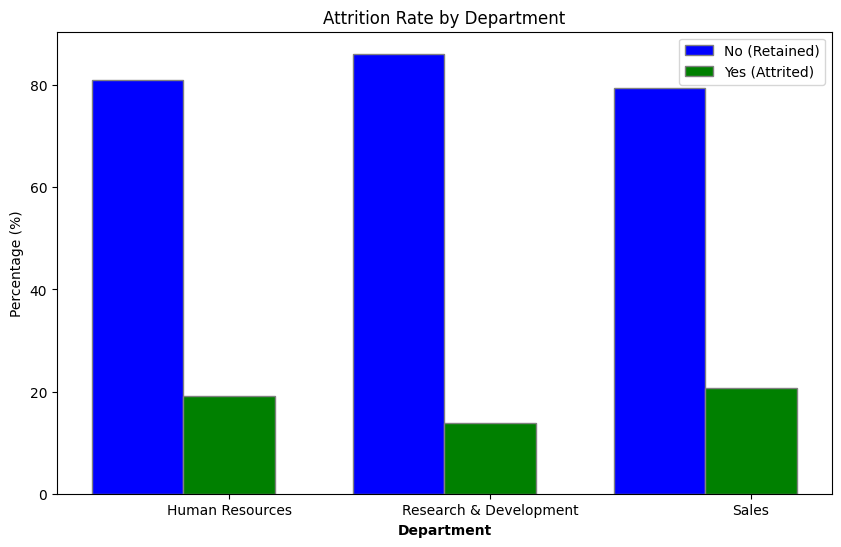

In [35]:
import matplotlib.pyplot as plt
import numpy as np

departments = ['Human Resources', 'Research & Development', 'Sales']
attrition_yes = [19.05, 13.84, 20.63]  # Attrition rates
attrition_no = [80.95, 86.16, 79.37]  # Retention rates

barWidth = 0.35
r1 = np.arange(len(departments))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(10,6))
plt.bar(r1, attrition_no, color='blue', width=barWidth, edgecolor='grey', label='No (Retained)')
plt.bar(r2, attrition_yes, color='green', width=barWidth, edgecolor='grey', label='Yes (Attrited)')

plt.xlabel('Department', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(attrition_no))], departments)
plt.ylabel('Percentage (%)')
plt.title('Attrition Rate by Department')
plt.legend()

plt.show()



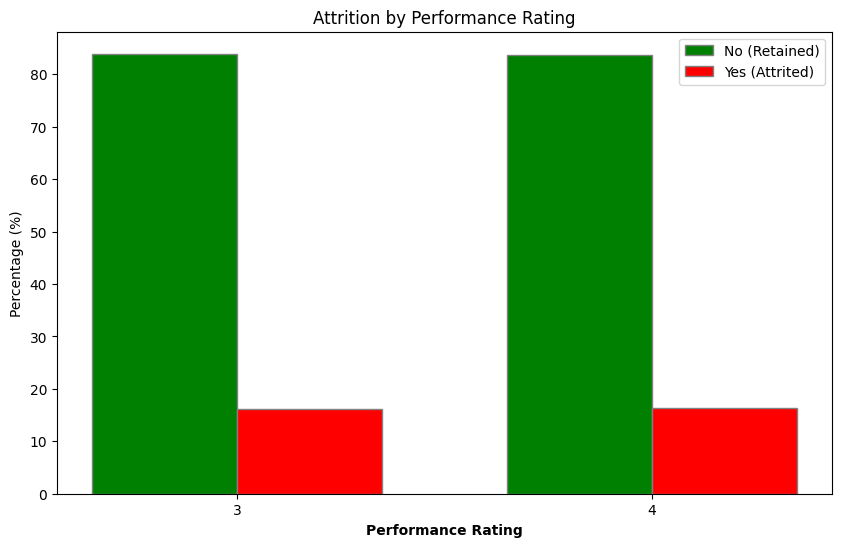

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Data
performance_ratings = ['3', '4']
attrition_yes = [16.08, 16.37]  # Yes percentages for each performance rating
attrition_no = [83.92, 83.63]  # No percentages for each performance rating

barWidth = 0.35
r1 = np.arange(len(performance_ratings))
r2 = [x + barWidth for x in r1]

# Create bars
plt.figure(figsize=(10, 6))
plt.bar(r1, attrition_no, color='green', width=barWidth, edgecolor='grey', label='No (Retained)')
plt.bar(r2, attrition_yes, color='red', width=barWidth, edgecolor='grey', label='Yes (Attrited)')

# Add xticks on the middle of the group bars
plt.xlabel('Performance Rating', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(attrition_no))], performance_ratings)
plt.ylabel('Percentage (%)')
plt.title('Attrition by Performance Rating')
plt.legend()

# Show plot
plt.show()


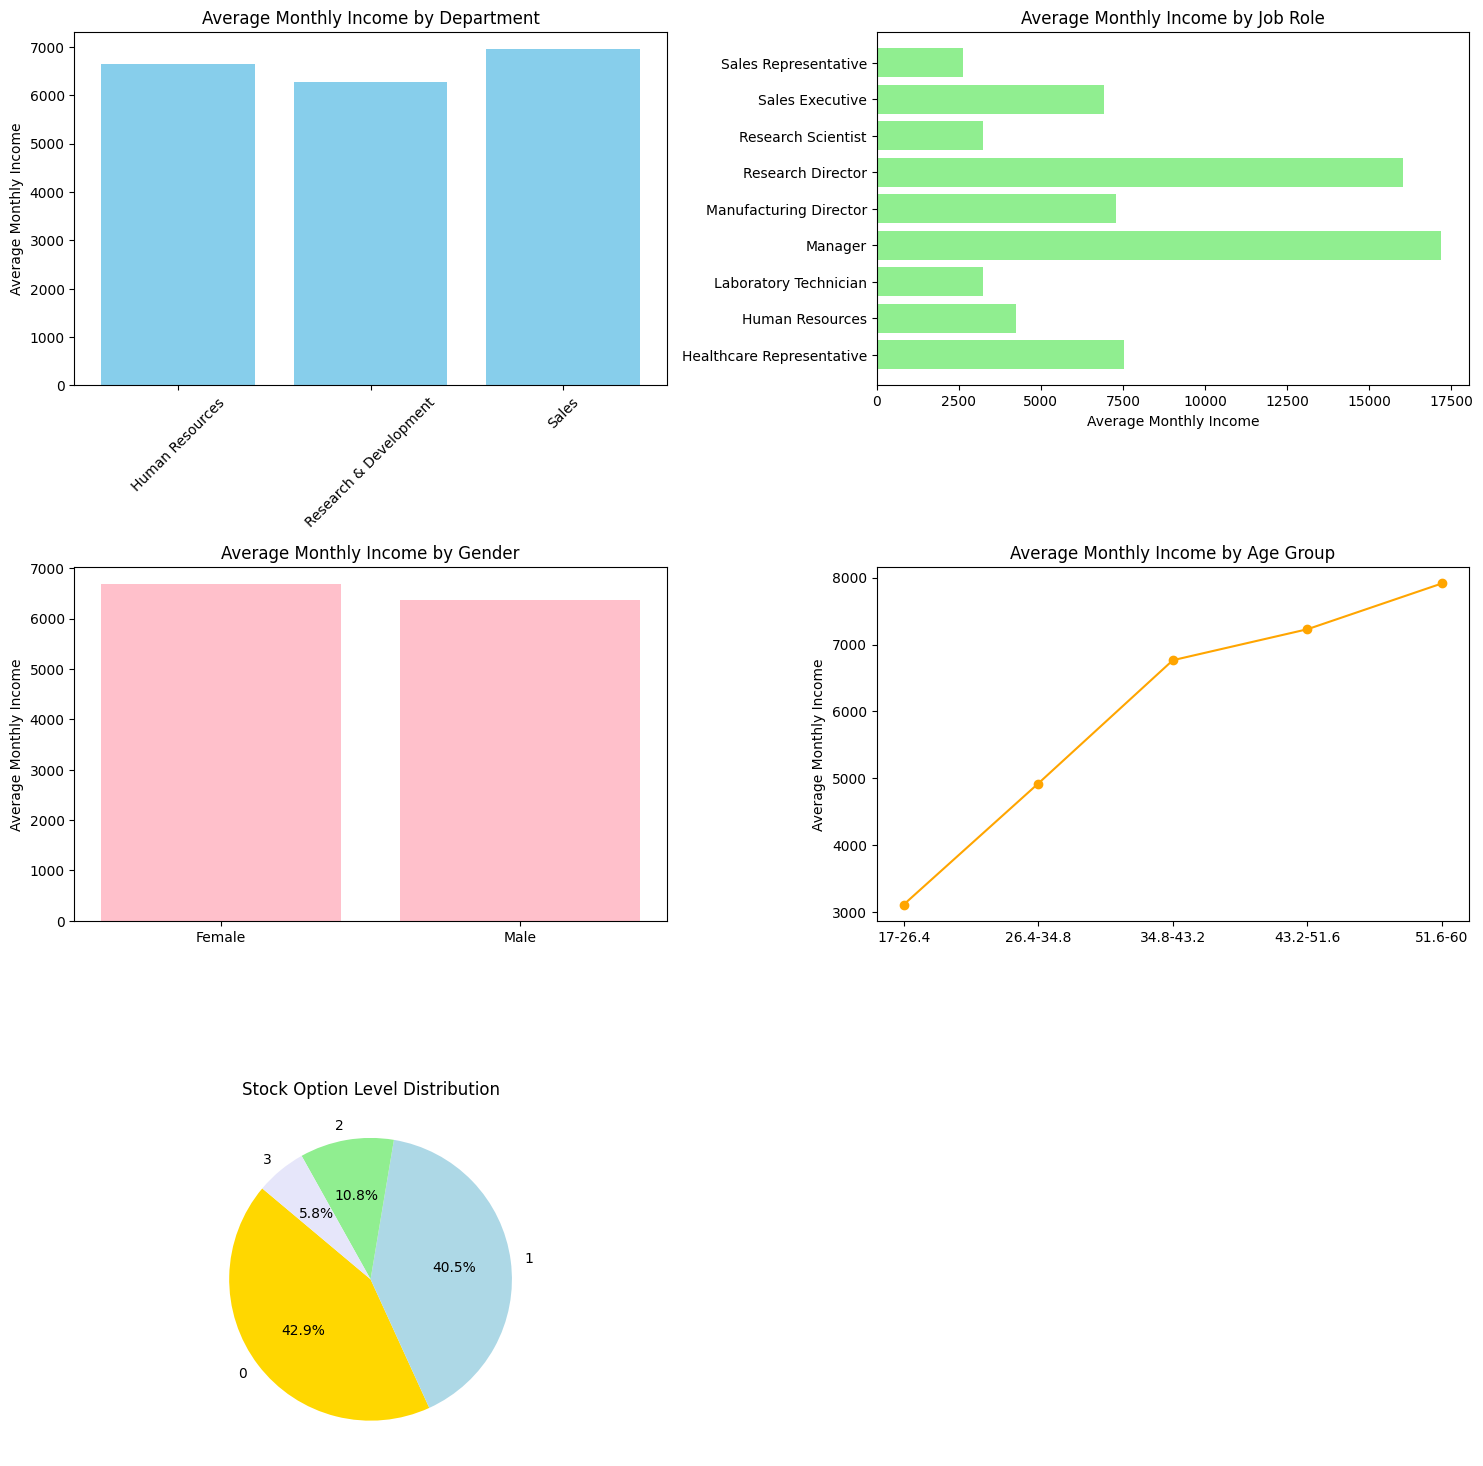

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Data for visualization
departments = ['Human Resources', 'Research & Development', 'Sales']
average_income_department = [6654.51, 6281.25, 6959.17]

job_roles = ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager',
             'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive',
             'Sales Representative']
average_income_role = [7528.76, 4235.75, 3237.17, 17181.68,
                       7295.14, 16033.55, 3239.97, 6924.28,
                       2626.00]

genders = ['Female', 'Male']
average_income_gender = [6686.57, 6380.51]

age_groups = ['17-26.4', '26.4-34.8', '34.8-43.2', '43.2-51.6', '51.6-60']
average_income_age = [3107.36, 4919.95, 6764.87, 7228.70, 7914.45]

stock_option_levels = ['0', '1', '2', '3']
stock_option_proportion = [42.93, 40.54, 10.75, 5.78]

# Creating subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Average Monthly Income by Department
axs[0, 0].bar(departments, average_income_department, color='skyblue')
axs[0, 0].set_title('Average Monthly Income by Department')
axs[0, 0].set_ylabel('Average Monthly Income')
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Average Monthly Income by Job Role
axs[0, 1].barh(job_roles, average_income_role, color='lightgreen')
axs[0, 1].set_title('Average Monthly Income by Job Role')
axs[0, 1].set_xlabel('Average Monthly Income')

# Plot 3: Average Monthly Income by Gender
axs[1, 0].bar(genders, average_income_gender, color='pink')
axs[1, 0].set_title('Average Monthly Income by Gender')
axs[1, 0].set_ylabel('Average Monthly Income')

# Plot 4: Average Monthly Income by Age Group
axs[1, 1].plot(age_groups, average_income_age, marker='o', linestyle='-', color='orange')
axs[1, 1].set_title('Average Monthly Income by Age Group')
axs[1, 1].set_ylabel('Average Monthly Income')

# Plot 5: Stock Option Level Distribution
axs[2, 0].pie(stock_option_proportion, labels=stock_option_levels, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightblue', 'lightgreen', 'lavender'])
axs[2, 0].set_title('Stock Option Level Distribution')

# Adjust layout
plt.tight_layout()

# Hide empty subplot (bottom right)
fig.delaxes(axs[2][1])

plt.show()


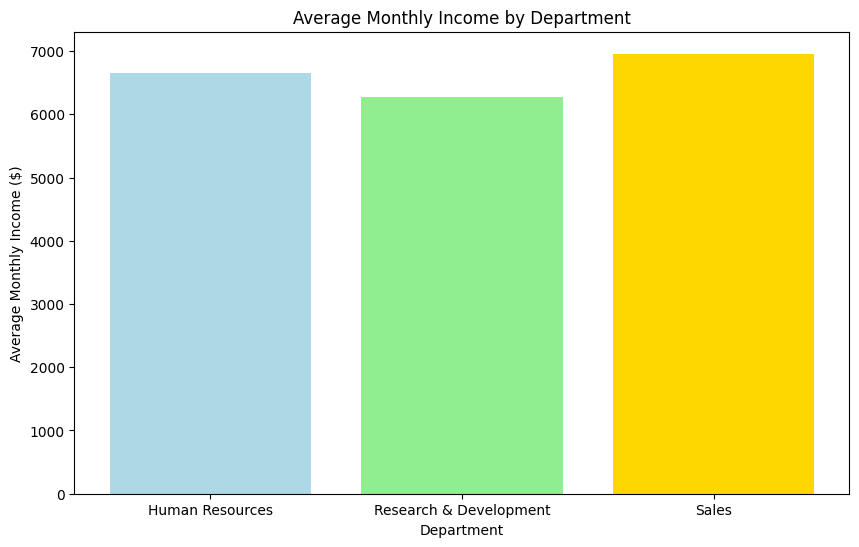

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Example for a bar chart for Average Monthly Income by Department
departments = ['Human Resources', 'Research & Development', 'Sales']
average_income = [6654.51, 6281.25, 6959.17]

plt.figure(figsize=(10, 6))
plt.bar(departments, average_income, color=['lightblue', 'lightgreen', 'gold'])
plt.title('Average Monthly Income by Department')
plt.xlabel('Department')
plt.ylabel('Average Monthly Income ($)')
plt.show()
